In [28]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [30]:
import pandas as pd
import urllib.request
#네이버 쇼핑 리뷰 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [7]:
total_data

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [9]:
reviews=total_data["reviews"]
reviews

0                                                   배공빠르고 굿
1                             택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2         아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3         선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4                         민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
                                ...                        
199995                                      장마라그런가!!! 달지않아요
199996    다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997                      로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998                                        넘이쁘고 쎄련되보이네요~
199999     아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다
Name: reviews, Length: 200000, dtype: object

In [11]:
#20만개는 너무 많아서 10000개만 적용
sampled_reviews = reviews[:10000]

message = ''
for review in sampled_reviews:
    message += re.sub(r'[^\w가-힣]', ' ', review) + ' '

In [13]:
#품사 태깅패키지 사용해서 명사만 추출 
nlp = Okt()
message_N = nlp.nouns(message)
message_N #작업 내용 확인용 출력

['배공',
 '굿',
 '택배',
 '엉망',
 '용',
 '집',
 '밑',
 '층',
 '말',
 '아주',
 '바지',
 '정말',
 '개',
 '더',
 '구매',
 '가격',
 '대박',
 '바느질',
 '조금',
 '가성',
 '비',
 '최고',
 '선물',
 '용',
 '전달',
 '상품',
 '머그컵',
 '당황',
 '바로',
 '배송',
 '누락',
 '확인',
 '안',
 '바로',
 '선물',
 '큰일',
 '날',
 '배송',
 '다시',
 '생각',
 '민트',
 '색상',
 '옆',
 '손잡이',
 '거',
 '용',
 '도로',
 '사용',
 '계란',
 '때',
 '완전',
 '코팅',
 '보기',
 '실용',
 '생각',
 '진짜',
 '별로',
 '주문',
 '배송',
 '여기',
 '회사',
 '전화',
 '연락',
 '분',
 '곳',
 '추천',
 '길이',
 '주문',
 '안',
 '별로',
 '보폴',
 '계속',
 '때',
 '지금',
 '안나',
 '전문',
 '속옷',
 '브랜드',
 '위생',
 '팬티',
 '해',
 '밴딩부분',
 '신축',
 '일반',
 '실로',
 '빅사',
 '임',
 '빅사',
 '이즈',
 '벗',
 '때',
 '밴딩부분',
 '때',
 '밴딩',
 '말',
 '사이즈',
 '베이지',
 '색',
 '구매',
 '약간',
 '살색',
 '화면',
 '빨',
 '컬러',
 '맛',
 '그냥',
 '별루',
 '치',
 '티',
 '치',
 '탛캏타',
 '티',
 '티',
 '티',
 '티',
 '티',
 '치',
 '치',
 '처',
 '치',
 '처',
 '치',
 '려',
 '촉감',
 '무게',
 '감',
 '핏',
 '불',
 '사이즈',
 '친구',
 '향',
 '해',
 '실내',
 '하나',
 '가게',
 '운영',
 '사장',
 '대신',
 '구매',
 '구매',
 '가게',
 '가성',
 '비',
 '바퀴',
 '고정',
 '개',
 '린데',
 '화장',
 '거

In [18]:
#추출한 명사들의 빈도 확인 
count = Counter(message_N)
count #작업 내용 확인용 출력

Counter({'배송': 1413,
         '구매': 834,
         '사용': 664,
         '제품': 620,
         '그냥': 595,
         '가격': 556,
         '좀': 547,
         '생각': 546,
         '주문': 511,
         '맛': 480,
         '때': 430,
         '더': 410,
         '별로': 404,
         '사이즈': 387,
         '것': 378,
         '포장': 341,
         '개': 338,
         '상품': 333,
         '거': 319,
         '냄새': 308,
         '정말': 297,
         '요': 288,
         '하나': 279,
         '부분': 262,
         '진짜': 248,
         '안': 242,
         '조금': 236,
         '반품': 231,
         '구입': 229,
         '아주': 217,
         '또': 214,
         '정도': 211,
         '느낌': 206,
         '아이': 203,
         '완전': 198,
         '다시': 195,
         '맘': 195,
         '사진': 194,
         '디자인': 173,
         '색상': 170,
         '처음': 169,
         '효과': 169,
         '비': 166,
         '제': 164,
         '저': 164,
         '마음': 162,
         '이': 156,
         '용': 155,
         '선물': 154,
         '다른': 154,
         '걸':

In [20]:
#명사들중 상위 80개의 단어중 길이가 1보다 큰것만 저장하면서 딕셔너리화  
word_count = dict() 
for tag, counts in count.most_common(80): 
    if(len(str(tag))>1): 
        word_count[tag] = counts 
        print("%s : %d" % (tag, counts))

배송 : 1413
구매 : 834
사용 : 664
제품 : 620
그냥 : 595
가격 : 556
생각 : 546
주문 : 511
별로 : 404
사이즈 : 387
포장 : 341
상품 : 333
냄새 : 308
정말 : 297
하나 : 279
부분 : 262
진짜 : 248
조금 : 236
반품 : 231
구입 : 229
아주 : 217
정도 : 211
느낌 : 206
아이 : 203
완전 : 198
다시 : 195
사진 : 194
디자인 : 173
색상 : 170
처음 : 169
효과 : 169
마음 : 162
선물 : 154
다른 : 154
크기 : 151
대비 : 148
바로 : 143
보고 : 143
항상 : 142
한번 : 140
추천 : 139
상태 : 139
교환 : 138
물건 : 136
다음 : 136
가성 : 127
박스 : 126
만족 : 125
계속 : 123
이번 : 123
실망 : 122
설치 : 119


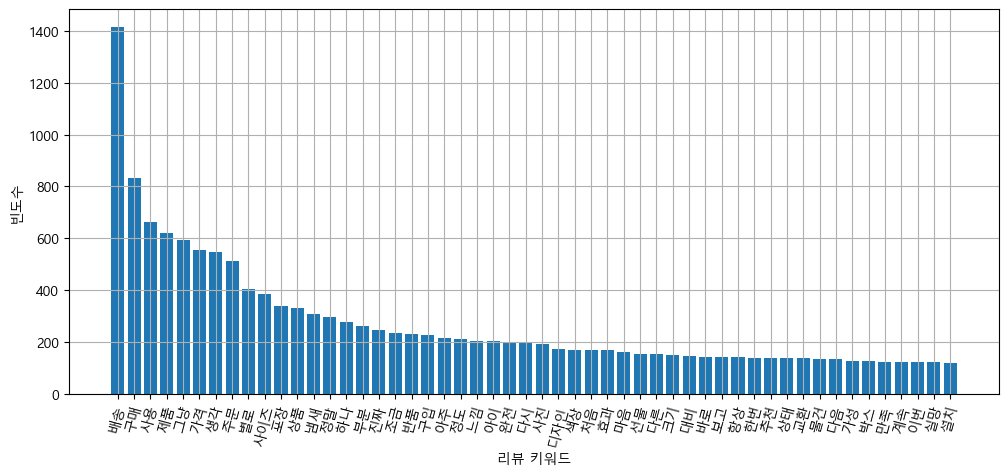

In [22]:
#명사들의 빈도수를 히스토그램을 그려서 시각화
font_path = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

plt.figure(figsize = (12, 5))
plt.xlabel('리뷰 키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)

plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

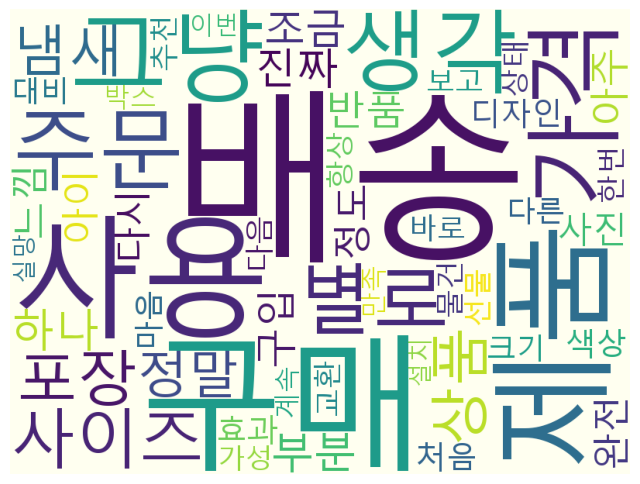

In [24]:
#리뷰 키워드를 워드클라우드를 사용해서 시각화
wc = WordCloud(font_path, 
               background_color = 'ivory', 
               width = 800,
               height = 600)
cloud = wc.generate_from_frequencies(word_count)

plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

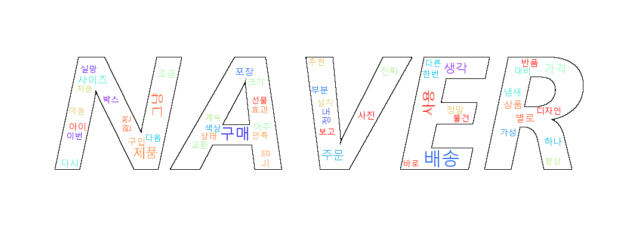

In [34]:
from PIL import Image,ImageFilter
import numpy as np
masking_image = np.array(Image.open("C:\\Users\\user\\0Data\\0923_text\\naver1.png"))

wc = WordCloud(font_path="C:/Windows/fonts/malgun.ttf",
               width=800, height=600, 
               mask=masking_image,  # masking
               background_color='white',
               contour_width=1,
               colormap='rainbow'  # 컬러맵 추가
               ).generate_from_frequencies(word_count)

plt.figure(figsize=(8, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [113]:
from PIL import Image, ImageFilter
import numpy as np
tokki=Image.open('C:/Users/user/0Data/0923_text/5.png')
# tokki = tokki.filter(ImageFilter.GaussianBlur(2))
tokki = np.array(tokki)
tokki

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

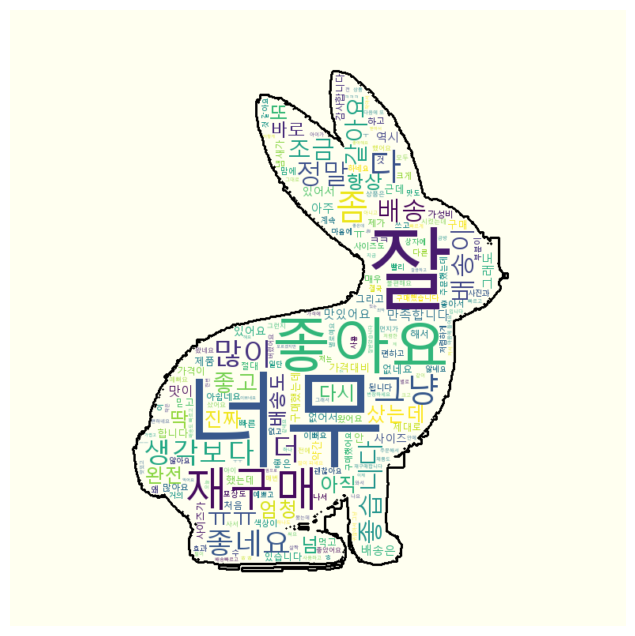

In [115]:
from PIL import Image
import numpy as np
# tokki=np.array(Image.open('C:/Users/user/0Data/0923_text/5.png'))
wc = WordCloud(
    font_path = "c:/Windows/fonts/malgun.ttf",  # 한국어 폰트 경로
    mask=tokki,
    background_color='ivory',
    contour_color='black',
    contour_width=2,
    width=800, 
    height=600
).generate(message)

# 워드클라우드 출력
plt.figure(figsize=(10, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # 축 제거
plt.show()

In [ ]:
message = ''
for reivew in reviews:
        message = message + re.sub(r'[^\w]', ' ', reivew) +''
message #작업 내용 확인용 출력